In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/NLP/AI\ Challenge\ 3

Mounted at /content/drive
/content/drive/MyDrive/NLP/AI Challenge 3


In [ ]:
%ls

AI_Challenge3.ipynb            vietnamese-stopwords-dash.txt.1  vietnamese-stopwords-dash.txt.5
data/                          vietnamese-stopwords-dash.txt.2  vietnamese-stopwords-dash.txt.6
embedding/                     vietnamese-stopwords-dash.txt.3
vietnamese-stopwords-dash.txt  vietnamese-stopwords-dash.txt.4


In [ ]:
!pip install pyvi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import torchtext
import torch

train_path = './data/vihsd/train.csv'
dev_path = './data/vihsd/dev.csv'
test_path = './data/vihsd/test.csv'

In [ ]:
train_data = pd.read_csv(train_path)
dev_data = pd.read_csv(dev_path)
test_data = pd.read_csv(test_path)

print(train_data.shape)
print(train_data.head())

(24048, 2)
                                           free_text  label_id
0  Em được làm fan cứng luôn rồi nè ❤️ reaction q...         0
1  Đúng là bọn mắt híp lò xo thụt :))) bên việt n...         2
2           Đậu Văn Cường giờ giống thằng sida hơn à         0
3  CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...         2
4  Từ lý thuyết đến thực hành là cả 1 câu chuyện ...         0


In [ ]:
label = train_data['label_id'].unique()
label

array([0, 2, 1])

In [ ]:
train_data[train_data['label_id'] == 2]

,free_text,label_id
1,Đúng là bọn mắt híp lò xo thụt :))) bên việt n...,2
3,CÔN ĐỒ CỤC SÚC VÔ NHÂN TÍNH ĐỀ NGHI VN. NHÀ NƯ...,2
9,"Thế mà mình nói mấy thằng bắc kì, bọn đó lại b...",2
16,Loại này cho dựa cột thôi chứ độ thế nào,2
19,Ủa chứ bữa xin lỗi khóc tế om xòm mà giờ chửi ...,2
...,...,...
23950,Dũng thằng xàm lol,2
23961,Bổ chết moẹ abe bây giờ,2
24013,"Công nghệ của cs đã đạt mức thượng thừa rồi, c...",2
24016,Corona ăn mất cái ý thức của chị rồi hả chị ơi :),2


In [ ]:
train_data[train_data['label_id'] == 1]

,free_text,label_id
7,Lúp lúp như chó .,1
18,Dạy bơi cho cá. Bơi thì đương nhiên nó bơi đượ...,1
38,Ý thức còn ít hơn cả số tiền trong túi t,1
47,xxx video 🔞,1
58,Đấu khẩu - Chim lợn 👍,1
...,...,...
23990,Vcl ạ,1
23993,Cái đb gì vậy?,1
23994,Nhìn gớm và tởm vậy,1
24027,Đéo thấy thằng nào bị tử hình... vì các nghìn ...,1


In [ ]:
print(train_data[train_data['label_id'] == 0].iloc[0].free_text)

Em được làm fan cứng luôn rồi nè ❤️ reaction quá hay quá cute coi mấy giờ này quá hợp lí =]]]


So the label will be
- 0: Clean
- 1: Offensive
- 2: Hate

# Import ViTokenizer

# Preprocess the null values in the dataset

In [ ]:
train_data.isnull().sum()

free_text    2
label_id     0
dtype: int64

In [ ]:
dev_data.isnull().sum()

free_text    0
label_id     0
dtype: int64

In [ ]:
test_data.isnull().sum()

free_text    0
label_id     0
dtype: int64

In [ ]:
train_data.dropna(axis = 0, inplace = True)
print(f"Total of null values in train dataset is: \n{train_data.isnull().sum()}")

Total of null values in train dataset is: 
free_text    0
label_id     0
dtype: int64


# Prepare data proccessing pipelines

In [ ]:
train_data[train_data['label_id'].isnull()]

,free_text,label_id


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24046 entries, 0 to 24047
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   free_text  24046 non-null  object
 1   label_id   24046 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 563.6+ KB


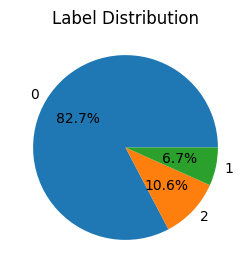

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming train_data is a DataFrame
# Drop rows with NaN values in the 'label_id' column
train_data = train_data.dropna(subset=['label_id'])

# Plot the pie chart
plt.figure(figsize=(3, 3))
train_data['label_id'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')
plt.ylabel('')  # Remove the 'label_id' y-axis label
plt.show()

In [ ]:
train_data[train_data['label_id'] == 0]

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
2,Đậu Văn Cường giờ giống thằng sida hơn à,0
4,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0
5,Coronavirus is manmade,0
6,Đố chúng m nhận ra ai,0
...,...,...
24043,Thả tim cho sự cống hiến của ngài,0
24044,Thua !,0
24045,Ở Việt Nam thì có khánh sky..hải ngoại có trần...,0
24046,"1:22 ai lớp du chu cờ moo, Duyên dáng quá cô ơi",0


(59655, 2)


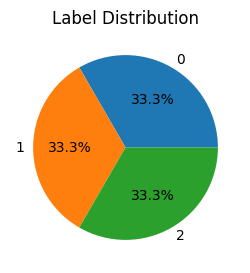

In [ ]:
from sklearn.utils import resample

clean_messages = train_data[train_data['label_id'] == 0]
offensive_messages = train_data[train_data['label_id'] == 1]
harm_messages = train_data[train_data['label_id'] == 2]

offensize_messages_up = resample(offensive_messages,
                              n_samples = len(clean_messages),
                              random_state = 42)
harm_messages_up = resample(harm_messages,
                              n_samples = len(clean_messages),
                              random_state = 42)

upsampled_df = pd.concat([clean_messages, offensize_messages_up, harm_messages_up])
print(upsampled_df.shape)


plt.figure(figsize=(3, 3))
upsampled_df['label_id'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Label Distribution')
plt.ylabel('')  # Remove the 'label_id' y-axis label
plt.show()

In [ ]:
upsampled_df = upsampled_df.reset_index(drop = True)
upsampled_df

,free_text,label_id
0,Em được làm fan cứng luôn rồi nè ❤️ reaction q...,0
1,Đậu Văn Cường giờ giống thằng sida hơn à,0
2,Từ lý thuyết đến thực hành là cả 1 câu chuyện ...,0
3,Coronavirus is manmade,0
4,Đố chúng m nhận ra ai,0
...,...,...
59650,Cái con này sao xe bắt chó kg bắt nó giùm cái,2
59651,Thầy ba dơ lắm cô ơi,2
59652,Cái miệng cua con bong thuôi này chuoi ngta sẽ...,2
59653,Táng chết cha tụi mày lũ học trò l :)),2


# Tokenize and build a word dictionary

In [ ]:
!wget https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt

--2023-12-24 12:46:26--  https://raw.githubusercontent.com/stopwords/vietnamese-stopwords/master/vietnamese-stopwords-dash.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20475 (20K) [text/plain]
Saving to: ‘vietnamese-stopwords-dash.txt.7’

vietnamese-stopword 100%[===================>]  20.00K  --.-KB/s    in 0.004s  

2023-12-24 12:46:26 (4.70 MB/s) - ‘vietnamese-stopwords-dash.txt.7’ saved [20475/20475]



In [ ]:
STOPWORDS = 'vietnamese-stopwords-dash.txt'
with open(STOPWORDS, "r") as ins:
    stopwords = []
    for line in ins:
        dd = line.strip('\n')
        stopwords.append(dd)

    stopwords = set(stopwords)

In [ ]:
from pyvi import ViTokenizer, ViUtils
import re

def deEmojify(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)

def filter_stop_words(train_sentences, stop_words):
    new_sent = [word for word in train_sentences.split() if word not in stop_words]
    train_sentences = ' '.join(new_sent)

    return train_sentences

def tokenizer(text, lowercased = True):
    text = ViTokenizer.tokenize(text)
    text = deEmojify(text)
    text = text.lower() if lowercased else text
    text = filter_stop_words(text, stopwords)

    return text.split(' ')




In [ ]:
from torchtext.vocab import build_vocab_from_iterator

def yield_tokens(file_csv):
    for index, row in file_csv.iterrows():
        # print(row['free_text'])
        yield tokenizer(row['free_text'])

vocab = build_vocab_from_iterator(yield_tokens(train_data), specials = ['<unk>'])
vocab.set_default_index(vocab['<unk>'])

In [ ]:
sentence = 'Em đi Hà Nội'

vocab(tokenizer(sentence))

[5, 615]

In [ ]:
unknown_token = vocab['<unk>']
unknown_token

0

# Generate data batch and iterator

In [ ]:
text_pipeline = lambda x : vocab(tokenizer(x))
label_pipeline = lambda x: int(x)

In [ ]:
from torch.utils.data import Dataset
from torch.nn.utils.rnn import pad_sequence


device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

class CustomDataset(Dataset):

    def __init__(self, dataframe, text_column, label_column, transform=None):
        """
        Args:
            dataframe (pd.DataFrame): Pandas DataFrame containing the data.
            text_column (str): Name of the column containing text data.
            label_column (str): Name of the column containing label data.
            transform (callable, optional): Optional transform to be applied
                on a sample.
        """
        self.dataframe = dataframe.reset_index(drop = True)
        self.text_column = text_column
        self.label_column = label_column
        self.transform = transform

        # print(self.dataframe)

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        text = self.dataframe.iloc[idx][self.text_column]
        label = self.dataframe.iloc[idx][self.label_column]

        sample = {'text': text, 'label': label}

        if self.transform:
            sample = self.transform(sample)

        return sample


def collate_batch(batch):
    label_list, text_list, lengths = [], [], []

    for i, sample in enumerate(batch):
        label_list.append(label_pipeline(sample['label']))
        process_text = torch.tensor(text_pipeline(sample['text']), dtype=torch.int64)
        text_list.append(process_text)
        lengths.append(process_text.size(0))

    label_list = torch.tensor(label_list, dtype=torch.int64)
    lengths = torch.tensor(lengths)
    text_list = pad_sequence(text_list, batch_first = True,
                             padding_value = unknown_token)

    return label_list.to(device), text_list.to(device), lengths.to('cpu')

In [87]:
from torch.utils.data import DataLoader


batch_size = 64

train_dataset = CustomDataset(upsampled_df,
                               text_column='free_text',
                               label_column='label_id')

valid_dataset = CustomDataset(dev_data,
                              text_column = 'free_text',
                              label_column = 'label_id')

test_dataset = CustomDataset(test_data,
                              text_column = 'free_text',
                              label_column = 'label_id')

train_loader = DataLoader(
    train_dataset, batch_size = batch_size, shuffle = True, collate_fn = collate_batch
)

valid_loader = DataLoader(
    valid_dataset, batch_size = batch_size, shuffle = True, collate_fn = collate_batch
)

test_loader = DataLoader(
    test_dataset, batch_size = batch_size, shuffle = True, collate_fn = collate_batch
)

labels, texts, offsets = next(iter(train_loader))

print(labels.shape)
print(texts.shape)
print(offsets.shape)

torch.Size([64])
torch.Size([64, 40])
torch.Size([64])


In [88]:
EMBEDDING_FILE = './embedding/cc.vi.300.vec'

embeddings_index = {}
with open(EMBEDDING_FILE, encoding='utf8') as f:
    for line in f:
        values = line.rstrip().rsplit(' ')
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeddings_index[word] = coefs

# Build the model

In [89]:
import torch.nn as nn
from torch.nn.utils.rnn import pack_padded_sequence, pad_packed_sequence

class BiLSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_size,
                 output_size, padding_idx, device):

        super(BiLSTM, self).__init__()

        # Embedding Layer
        self.embedding = nn.Embedding(vocab_size,
                                      embedding_dim,
                                    padding_idx = padding_idx)
        # Bi-LSTM Layer
        self.lstm = nn.LSTM(embedding_dim, hidden_size,
                            bidirectional = True, batch_first = True)

        # Fully connected layer
        self.fc = nn.Linear(hidden_size * 2, output_size)
        self.hidden_size = hidden_size

        self.to(device)


    def forward(self, texts, lengths, h0 = None, c0 = None):

        num_batch = texts.shape[0]
        embedded = self.embedding(texts)
        # print(embedded.shape)

        padded_sequence = pad_sequence(embedded, batch_first=True)

        # print(padded_sequence)
        packed_sequence = pack_padded_sequence(padded_sequence, lengths,
                                               batch_first=True,
                                               enforce_sorted=False)

        if h0 != None and c0 != None:
            lstm_out, _ = self.lstm(packed_sequence, (h0, c0))
        else:
            lstm_out, _ = self.lstm(packed_sequence)

        lstm_out, _ = pad_packed_sequence(lstm_out, batch_first = True)

        # print(lstm_out.shape)
        # print(lstm_out[:, -1, :self.hidden_size].shape)
        # print(lstm_out[:, 0, self.hidden_size:].shape)

        # out_concat = torch.cat((lstm_out[:, -1, :self.hidden_size],
        #                         lstm_out[:, 0, self.hidden_size:]))

        out_concat = lstm_out[:, -1, :]

        out_concat = out_concat.view(num_batch, -1)
        # print(out_concat.shape)
        output = self.fc(out_concat)

        return output


In [90]:
vocab_size = len(vocab)
embedding_dim = 300

hidden_size = 256
output_size = 3
padding_idx = vocab['<unk>']


model = BiLSTM(vocab_size, embedding_dim, hidden_size,
               output_size, padding_idx, device)


def load_embedding(self):
    for idx, token in enumerate(vocab.get_itos()):
        if token in embeddings_index:
            model.embedding.weight.data[idx] = torch.tensor(embeddings_index[token])

In [91]:
model

BiLSTM(
  (embedding): Embedding(19024, 300, padding_idx=0)
  (lstm): LSTM(300, 256, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=512, out_features=3, bias=True)
)

In [92]:
# The number of parameters

num_params = sum(p.numel() for p in model.parameters())
print("Number of parameters in the model:", num_params)

Number of parameters in the model: 6851523


In [93]:
def compute_accuracy(y_pred, y_target):
    _, y_pred_indicies = y_pred.max(dim = 1)
    n_correct = (y_pred_indicies == y_target).sum().item()

    return n_correct

In [94]:
lr = 0.05
momentum = 0.9
weight_decay = 1e-4

loss_func = nn.CrossEntropyLoss().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr,
                            momentum = momentum, weight_decay = weight_decay)


In [ ]:
from tqdm.notebook import tqdm

num_epochs = 50
train_loss = []
train_acc = []
val_loss = []
val_acc = []


epoch_bar = tqdm(desc = 'Epoch', total = num_epochs,
                 position = 0)


train_bar = tqdm(desc = 'Training',
                 total = len(train_loader),
                 position = 1, leave = True)

val_bar = tqdm(desc = 'Validation',
               total = len(valid_loader),
                 position = 1, leave = True)

print("🚀 Training Self-Attention 🚀")


for epoch in range(num_epochs):

    epoch_bar.set_description(f'Epoch {epoch + 1}/{num_epochs}')

    model.train()

    running_loss = 0.0
    running_acc = 0.0
    total_loss = 0.0
    total_acc = 0.0
    total = 0


    len_trainloader = len(train_loader)

    for i, batch in enumerate(train_loader):
        optimizer.zero_grad()

        labels, texts, lengths = batch

        # Initialize initial hidden state and cell state
        h0 = torch.zeros(2, batch_size, hidden_size).to(device)  # 2 for bidirectional, batch size
        c0 = torch.zeros(2, batch_size, hidden_size).to(device)
        # print(batch_dict['len_sen'])

        y_pred = model(texts, lengths, h0, c0)
        # print(y_pred.shape)


        # Calculate Loss
        loss = loss_func(y_pred, labels)
        loss_t = loss.item()
        running_loss += (loss_t - running_loss) / (i + 1)
        total_loss += loss_t

        # Backward pass
        loss.backward()
        optimizer.step()

        # Calculating the accuracy
        num_correct = compute_accuracy(y_pred, labels)
        acc_t = num_correct / len(y_pred) * 100
        running_acc += (acc_t - running_acc) / (i + 1)
        total_acc += num_correct

        total += len(y_pred)

        train_bar.set_postfix(loss = running_loss,
                              acc = f"{running_acc:.2f}%",
                              epoch = epoch + 1)
        train_bar.update()

    current_loss = total_loss / len_trainloader
    current_acc = total_acc / total * 100
    train_loss.append(current_loss)
    train_acc.append(current_acc)

    print("========================================")
    print("\033[1;34m" + f"Epoch {epoch + 1}/{num_epochs}" + "\033[0m")
    print(f"Train Loss: {current_loss:.2f}\t|\tTrain Acc: {current_acc:.2f}%")



    model.eval()

    running_loss = 0.0
    running_acc = 0.0
    total_loss = 0.0
    total_acc = 0.0
    total = 0

    len_valloader = len(valid_loader)


    with torch.no_grad():

        for i, batch in enumerate(valid_loader):

            labels, texts, lengths = batch


            y_pred = model(texts, lengths)
            # print(y_pred.shape)

            # Calculate Loss
            loss = loss_func(y_pred, labels)
            loss_t = loss.item()
            running_loss += (loss_t - running_loss) / (i + 1)
            total_loss += loss_t



            # Calculating the accuracy
            num_correct = compute_accuracy(y_pred, labels)
            acc_t = num_correct / len(y_pred) * 100
            running_acc += (acc_t - running_acc) / (i + 1)
            total_acc += num_correct

            total += len(y_pred)

            val_bar.set_postfix(loss = running_loss,
                                acc = f"{running_acc:.2f}%",
                                epoch = epoch + 1)
            val_bar.update()

    current_loss = total_loss / len_valloader
    current_acc = total_acc / total * 100
    val_loss.append(current_loss)
    val_acc.append(current_acc)

    print(f"Val Loss: {current_loss:.2f}\t|\tVal Acc: {current_acc:.2f}%")

    train_bar.n = 0
    val_bar.n = 0
    epoch_bar.update()

print("========================================")
print("Training Completed! 😀")


Epoch:   0%|          | 0/50 [00:00<?, ?it/s]

Training:   0%|          | 0/933 [00:00<?, ?it/s]

Validation:   0%|          | 0/42 [00:00<?, ?it/s]

🚀 Training Self-Attention 🚀
Epoch 1/50
Train Loss: 1.10	|	Train Acc: 34.42%
Val Loss: 1.16	|	Val Acc: 10.10%
Epoch 2/50
Train Loss: 1.09	|	Train Acc: 34.07%
Val Loss: 1.10	|	Val Acc: 10.14%
Epoch 3/50
Train Loss: 1.09	|	Train Acc: 34.28%
Val Loss: 1.15	|	Val Acc: 10.07%
Epoch 4/50
Train Loss: 1.09	|	Train Acc: 34.74%
Val Loss: 1.13	|	Val Acc: 8.27%


In [66]:
# embedding_file_path = './embedding/cc.vi.300.vec'

# with open(embedding_file_path, 'r', encoding='utf-8') as file:
#     lines = file.readlines()[1:]
#     word_to_index = {line.split()[0]: i for i, line in enumerate(lines)}
#     embeddings = [list(map(float, line.split()[1:])) for line in lines]

#     for word, index in vocab.stoi.items():
#         if word in word_to_index:
#             model.embedding.weight.data[index] = torch.tensor(embeddings[word_to_index[word]])

So the label will be
- 0: Clean
- 1: Offensive
- 2: Hate

In [84]:
text = [torch.tensor(text_pipeline('địt mẹ cộng sản'), dtype = torch.int64)]
length = [len(texting) for texting in text]


testing = pad_sequence(text, batch_first = True).to(device)

print(testing.shape)


with torch.no_grad():
    abc = model.forward(testing, length)
    _, label = abc.max(dim = 1)
    print(label)

torch.Size([1, 2])
tensor([0], device='cuda:0')


In [81]:
model

BiLSTM(
  (embedding): Embedding(19024, 300, padding_idx=0)
  (lstm): LSTM(300, 256, batch_first=True, bidirectional=True)
  (fc): Linear(in_features=512, out_features=3, bias=True)
)

In [86]:
upsampled_df[upsampled_df['label_id'] == 2]

,free_text,label_id
39770,Thiếu nốt cái live là anh chăng khác gì bọn cô...,2
39771,Sao mấy stt này ko thấy con chó DLV vào ẳng nhỉ?,2
39772,Lại một thằng óc tôm.,2
39773,ĐM. DN nào cũng đóng thuế cả nghìn tỉ. Thế có ...,2
39774,Móe...chuyện này đã biết từ lâu rồi giờ mới bi...,2
...,...,...
59650,Cái con này sao xe bắt chó kg bắt nó giùm cái,2
59651,Thầy ba dơ lắm cô ơi,2
59652,Cái miệng cua con bong thuôi này chuoi ngta sẽ...,2
59653,Táng chết cha tụi mày lũ học trò l :)),2
